# Building with LangGraph

## Building a ChatBot

In [1]:
pip install --upgrade -q openai langchain langchain-openai langchain-community langgraph langgraph-checkpoint-sqlite

Note: you may need to restart the kernel to use updated packages.


In [2]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [3]:
# loading the API key from .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)

# defining the chatbot node
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# adding the node to the graph
graph_builder.add_node("chatbot", chatbot)

# setting the entry and the finish points
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

## Visualizing the Graph

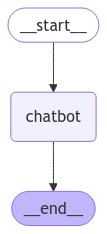

In [5]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [1]:
pip install -q grandalf

Note: you may need to restart the kernel to use updated packages.


In [6]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


## Running the ChatBot

In [7]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print(f'Assistant: {value["messages"][-1].content}')
            print('-' * 20)

User:  Paris is ...


Assistant: Paris is the capital city of France, known for its rich history, art, fashion, and culture. It is famous for iconic landmarks such as the Eiffel Tower, the Louvre Museum, and Notre-Dame Cathedral. The city is often referred to as "The City of Light" and is celebrated for its romantic ambiance, world-class cuisine, and vibrant street life. Paris is also a major center for business, education, and diplomacy in Europe. Whether you're exploring its charming neighborhoods like Montmartre or enjoying a stroll along the Seine River, Paris offers a unique blend of history and modernity.
--------------------


User:  History of Notre-Dame.


Assistant: The history of Notre-Dame Cathedral, located on the Île de la Cité in Paris, France, is rich and complex, spanning nearly 900 years. Here is an overview of its significant milestones:

### Early History and Construction
- **12th Century**: The site of Notre-Dame has been a place of worship since antiquity, with various churches built there before the current cathedral. Construction of the present Gothic structure began in 1163 under Bishop Maurice de Sully. The cathedral was built to accommodate the growing population of Paris and to serve as a symbol of the Church’s power.
- **Construction Phases**: The cathedral was built in several phases, with the main structure completed by 1250. The iconic flying buttresses, which support the walls and allow for large stained glass windows, were added later in the 13th century.

### Architectural Features
- **Gothic Architecture**: Notre-Dame is a prime example of French Gothic architecture, characterized by its ribbed vaults, flying b

User:  quit


Goodbye!


## Tavily AI

In [9]:
pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [8]:
from tavily import TavilyClient
import os

# initializing a Tavily client
client = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))

response = client.search(query='EUFA EURO 2024 FINAL')
response

{'query': 'EUFA EURO 2024 FINAL',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'UEFA Euro 2024 final - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final',
   'content': "The UEFA Euro 2024 final was a football match that determined the winners of UEFA Euro 2024.The match was the seventeenth final of the European Championship, a quadrennial tournament contested by the men's national teams of the member associations of UEFA to decide the champions of Europe. The match was held at the Olympiastadion in Berlin, Germany, on 14 July 2024, and was contested by Spain ...",
   'score': 0.99942297,
   'raw_content': None},
  {'title': 'Spain vs. England Highlights | UEFA Euro 2024 | Final',
   'url': 'https://www.foxsports.com/watch/fmc-6s3o670adn0rrlmt',
   'content': 'Check out the top moments between Spain and England in the UEFA Euro 2024 Final! JULY 14・fox soccer now・11:23. UEFA EuroEnglandSpainLamine YamalNico WilliamsCole Pal

In [9]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: UEFA Euro 2024 final - Wikipedia, URL: https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final
Title: Spain vs. England Highlights | UEFA Euro 2024 | Final, URL: https://www.foxsports.com/watch/fmc-6s3o670adn0rrlmt
Title: EURO 2024 final: Who was in it? When and where was it? | UEFA EURO 2024, URL: https://www.uefa.com/euro2024/news/0284-18bb952a9458-2a9e1ff202c4-1000--euro-2024-final-when-and-where-is-it/
Title: Spain vs England 2-1: UEFA Euro 2024 final - as it happened, URL: https://www.aljazeera.com/sports/liveblog/2024/7/14/live-spain-vs-england-uefa-euro-2024-final
Title: Spain beat England to win Euro 2024 final with late Oyarzabal goal, URL: https://supersport.com/football/uefa-euro/news/42ab7223-039f-47b9-8d28-8f652498118d/spain-beat-england-to-win-euro-2024-final-with-late-oyarzabal-goal


In [10]:
response = client.search(
    query='What are LLM agents?',
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)
response

{'query': 'What are LLM agents?',
 'follow_up_questions': None,
 'answer': 'LLM agents are advanced AI systems designed for creating complex text that requires sequential reasoning. They are capable of thinking ahead, remembering past conversations, and adjusting their responses based on the situation and required style. These agents can utilize tools like a planning module for question-decomposition, a RAG pipeline for information retrieval, and memory modules for accurate handling of subquestions. They play a crucial role in enterprise applications by enabling tasks such as generating context-aware answers, solving complex programmatically tasks, and searching for information over the internet using APIs.',
 'images': ['https://promptengineering.org/content/images/2023/08/Prompt-engineering---Large-Language-Model-LLM--Autonomous-Agent-Structure---PromptEngineering.org.jpg',
  'https://gptpluginz.com/wp-content/uploads/2023/10/Screen-Shot-2023-10-30-at-2.11.50-PM-1024x562.jpg',
  'htt

In [11]:
answer = client.qna_search(query='Who won the UEFA Champions League in 2024?')
print(answer)

Real Madrid won the UEFA Champions League in 2024 by defeating Borussia Dortmund 2-0 in the final on June 1st at Wembley Stadium.


In [12]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = 'What is the "Reflection & Critique" pattern used in agentic applications and LangGraph?'

response = client.search(query, max_results=5, search_depth='advanced')['results']
response

[{'title': 'Tutorials - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraphjs/tutorials/',
  'content': 'Reflection & Critique Tutorials¶ Welcome to the LangGraph Tutorials! These notebooks introduce LangGraph through building various language agents and applications. Quick Start¶ Learn the basics of LangGraph through a comprehensive quick start in which you will build an agent from scratch.',
  'score': 0.9991896,
  'raw_content': None},
 {'title': 'Tutorials - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/tutorials/',
  'content': 'Reflection & Critique¶ Basic Reflection: Prompt the agent to reflect on and revise its outputs; Reflexion: Critique missing and superfluous details to guide next steps; Language Agent Tree Search: Use reflection and rewards to drive a tree search over agents; Self-Discover Agent: Analyze an agent that learns about its own capabilities ...',
  'score': 0.9986646,
  'raw_content': None}]

In [13]:
# setting up the OpenAI API prompt
prompt = [
    {
        'role': 'system',
        'content': f'''You are an AI critical thinker research assistant. 
        Your sole purpose is to write well written, objective and structured reports on given text.'''
    },
    {
        'role': 'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report'''
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant. \n        Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: """[{\'title\': \'Tutorials - GitHub Pages\', \'url\': \'https://langchain-ai.github.io/langgraphjs/tutorials/\', \'content\': \'Reflection & Critique Tutorials¶ Welcome to the LangGraph Tutorials! These notebooks introduce LangGraph through building various language agents and applications. Quick Start¶ Learn the basics of LangGraph through a comprehensive quick start in which you will build an agent from scratch.\', \'score\': 0.9991896, \'raw_content\': None}, {\'title\': \'Tutorials - GitHub Pages\', \'url\': \'https://langchain-ai.github.io/langgraph/tutorials/\', \'content\': \'Reflection & Critique¶ Basic Reflection: Prompt the agent to reflect on and revise its outputs; Reflexion: Critique missing and superfluous details t

In [14]:
response = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)
print(response.content)

# Report on the "Reflection & Critique" Pattern in Agentic Applications and LangGraph

## Introduction
The "Reflection & Critique" pattern is a significant component of agentic applications, particularly in the context of LangGraph, a framework designed for creating language agents and applications. This report explores the structure and purpose of the "Reflection & Critique" pattern as presented in the LangGraph tutorials.

## Overview of LangGraph
LangGraph is a framework that allows developers to build language agents capable of interacting with users and performing complex language-based tasks. The tutorials provided by LangGraph serve as a guide to understanding and implementing various functionalities of the framework, including the Reflection & Critique pattern.

## Reflection & Critique Pattern
The Reflection & Critique pattern encompasses various techniques aimed at enhancing the performance and reliability of language agents. Below are the core components of this pattern as h

## Enhancing the Chatbot with Tools

In [15]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [16]:
# defining the tools
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=3)
tools = [tool]

In [17]:
response = tool.invoke('What is GPT o1?')
response

[{'url': 'https://www.techtarget.com/WhatIs/feature/OpenAI-o1-explained-Everything-you-need-to-know',
  'content': "OpenAI's o1 models, launched in September 2024, enhance reasoning in AI and excel in complex tasks, such as generating and debugging code. The o1 models are initially intended to be preview models, designed to provide users -- as well as OpenAI -- with a different type of LLM experience than the GPT-4o model. OpenAI o1 can perform many tasks like any of OpenAI's other GPT models -- such as answering questions, summarizing content and generating new content. The o1 models are optimized for complex reasoning tasks, especially in STEM (science, technology, engineering and mathematics). For API users OpenAI o1 is more expensive than previous models -- including GPT-4o. ##### What businesses should know about OpenAI's GPT-4o model  By: Will Kelly"},
 {'url': 'https://techcrunch.com/2024/09/12/openai-unveils-a-model-that-can-fact-check-itself/',
  'content': 'ChatGPT maker Open

In [18]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults

# --- new import
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=3)
tools = [tool]

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)

# tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

# change the chatbot() node function. Use llm_with_tools instead of llm.
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

# --- add this:
# run the tools if they are called by adding the tools to a new node.
# This node runs the tools requested in the last AIMessage.
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)
# ---

# --- add this
# define the conditional_edges.
# we'll use the prebuilt tools_condition in the conditional_edge to route to the ToolNode if the last message has tool calls,
# otherwise, route to the end.
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# ---

# any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")

# we don't need to explicitly set a finish_point because our graph already has a way to finish!
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

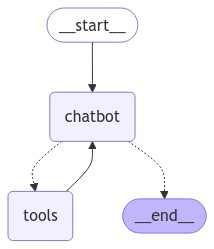

In [19]:
# Let's visualize the graph we've built. We'll use the same code as in the previous video.
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [20]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break
        
    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print('Assistant: ', value['messages'][-1].content)
        print('-' * 50)



User:  Who won the gold medal in 200m free style swimming at the Paris Olympics?


Assistant:  
--------------------------------------------------
Assistant:  [{"url": "https://www.reuters.com/sports/olympics/swimming-popovici-takes-mens-200-metres-freestyle-gold-2024-07-29/", "content": "Item 1 of 4 Paris 2024 Olympics - Swimming - Men's 200m Freestyle Final - Paris La Defense Arena, Nanterre, France - July 29, 2024. David Popovici of Romania looks on after winning gold."}, {"url": "https://bleacherreport.com/articles/10130042-olympic-swimming-2024-womens-200m-freestyle-medal-winners-times-and-results", "content": "Swimming (Olympic) Olympic Swimming 2024: Women's 200M Freestyle Medal Winners, Times and Results ... the 2016 gold medalist, had on the mid-range freestyle events at the Olympics. Titmus swept ..."}, {"url": "https://olympics.com/en/paris-2024/videos/men-s-200m-freestyle-final-swimming-olympic-games-paris-2024", "content": "The Men's 200m Freestyle was held on 29/07/2024 at Paris La Defense Arena. David Popovici (ROU) claimed Gold with a time of 1:44.72.

User:  NVIDIA A100 vs. NVIDIA RTX A6000


Assistant:  
--------------------------------------------------
Assistant:  [{"url": "https://www.techpowerup.com/gpu-specs/rtx-a6000.c3686", "content": "2560x1440. 3840x2160. The RTX A6000 is an enthusiast-class professional graphics card by NVIDIA, launched on October 5th, 2020. Built on the 8 nm process, and based on the GA102 graphics processor, the card supports DirectX 12 Ultimate. The GA102 graphics processor is a large chip with a die area of 628 mm² and 28,300 million transistors."}, {"url": "https://www.storagereview.com/review/nvidia-rtx-a6000-review", "content": "We installed the RTX A6000 in both the HP ZCentral 4R and the P620 workstations, which the RTX 8000 also used in some of our benchmarks:\nHP ZCentral 4R:\nLenovo ThinkStation P620:\nWe installed the RTX 8000 and RTX 3090 in a custom consumer-build for our Blender and LuxMark tests:\nSPECviewperf 2020\nFirst up is the SPECviewperf 2020 benchmark, the worldwide standard for measuring graphics performance of professio

User:  quit


Goodbye!


##  Adding Memory to the Chatbot

In [ ]:
pip install -q langgraph-checkpoint-sqlite

In [21]:
# loading the API key form .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [37]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools.tavily_search import TavilySearchResults

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=3)
tools = [tool]

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

graph_builder.add_node('chatbot', chatbot)
tool_node = ToolNode(tools=[tool])
graph_builder.add_node('tools', tool_node)

graph_builder.add_conditional_edges(
    'chatbot',
    tools_condition,
)

graph_builder.add_edge('tools', 'chatbot')
graph_builder.set_entry_point('chatbot')

In [38]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver ### fix

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver()) ### fix


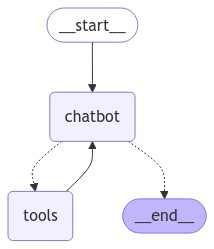

In [39]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
config = {'configurable': {'thread_id': '1'}}

In [41]:
prompt = 'What is the lastest AI model developed by OpenAI?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()


================================ Human Message =================================

What is the lastest AI model developed by OpenAI?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Gp3mvbuTsWS9atCt3xMAg3vz)
 Call ID: call_Gp3mvbuTsWS9atCt3xMAg3vz
  Args:
    query: latest AI model developed by OpenAI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://techcrunch.com/2024/09/12/openai-unveils-a-model-that-can-fact-check-itself/", "content": "ChatGPT maker OpenAI has announced its next major product release: A generative AI model code-named Strawberry, officially called OpenAI o1. OpenAI o1 avoids some of the reasoning pitfalls that normally trip up generative AI models because it can effectively fact-check itself by spending more time considering all parts of a question. What makes o1 “feel” qualitatively different from other gen

In [42]:
# It has memory!
prompt = 'What about Google?'
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()


================================ Human Message =================================

What about Google?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_UpFkdcZvWoQPHxs6OvvZAmeh)
 Call ID: call_UpFkdcZvWoQPHxs6OvvZAmeh
  Args:
    query: latest AI model developed by Google
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://blog.google/technology/ai/google-gemini-ai/", "content": "This is a long-term commitment that requires building collaboratively, so we’re partnering with the industry and broader ecosystem on defining best practices and setting safety and security benchmarks through organizations like MLCommons, the Frontier Model Forum and its AI Safety Fund, and our Secure AI Framework (SAIF), which was designed to help mitigate security risks specific to AI systems across the public and private sectors. This is a significant 

In [33]:
prompt = 'What did I ask you so far?'

events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()


================================ Human Message =================================

What did I ask you so far?
================================== Ai Message ==================================

So far, you have asked me the following questions:

1. What is the latest AI model developed by OpenAI?
2. What about Google?

If you have more questions or topics you'd like to discuss, feel free to let me know!


In [43]:
# NEW THREAD => no memory
config1 = {"configurable": {"thread_id": "10"}}

prompt = 'What did I ask you so far?'

events = graph.stream(
    {"messages": [("user", prompt)]}, config1, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()


================================ Human Message =================================

What did I ask you so far?
================================== Ai Message ==================================

You haven't asked me anything yet in this conversation. How can I assist you today?


In [44]:
snapshot = graph.get_state(config)
snapshot


StateSnapshot(values={'messages': [HumanMessage(content='What is the lastest AI model developed by OpenAI?', additional_kwargs={}, response_metadata={}, id='de7f95dd-7834-4278-af38-eb5f68977d9b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Gp3mvbuTsWS9atCt3xMAg3vz', 'function': {'arguments': '{"query":"latest AI model developed by OpenAI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 91, 'total_tokens': 115, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1bb46167f9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-84c0aa34-f9f7-4288-97e9-dbc025601471-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest AI model developed by OpenAI'}, 'id': 'call_Gp3mvbuTsWS9atCt3xMAg3vz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 91, 'output_t

In [45]:
snapshot.next

()